In [1]:
import pandas as pd
import numpy as np

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [19]:
X,y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [20]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0])

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, RocCurveDisplay

In [25]:
lr = LogisticRegression(max_iter=5000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [26]:
y_proba = lr.predict_proba(X_test)[:, 1]

In [27]:
y_proba

array([9.99342438e-01, 7.57839063e-01, 9.99819474e-01, 5.71035276e-16,
       4.97386159e-01, 1.54225724e-11, 9.84564093e-01, 9.98389310e-01,
       9.95847019e-01, 9.97329763e-01, 2.35786755e-03, 9.90828314e-01,
       9.99851161e-01, 9.15947701e-01, 9.99450013e-01, 1.46787971e-05,
       9.99716340e-01, 9.99813557e-01, 9.99280498e-01, 4.21870675e-09,
       9.99420932e-01, 9.99587035e-01, 9.93572989e-01, 9.99710165e-01,
       9.92697526e-01, 7.03912737e-06, 9.85098204e-01, 7.81421322e-01,
       4.34361115e-07, 1.69539958e-06, 9.20020497e-01, 9.90820289e-01,
       9.98432183e-01, 1.04260882e-25, 1.68649440e-06, 9.98859914e-01,
       9.97134570e-01, 5.20674377e-01, 9.99952419e-01, 9.99642036e-01,
       3.41297944e-11, 1.60279656e-04, 9.99268901e-01, 9.99890647e-01,
       1.63944591e-02, 9.99175411e-01, 9.99990754e-01, 9.99808267e-01,
       4.01077320e-21, 1.71132584e-05, 9.95735228e-01, 8.79343078e-03,
       3.86358866e-01, 9.99096690e-01, 9.99923239e-01, 3.11127949e-01,
      

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

In [29]:
thresholds

array([           inf, 9.99999223e-01, 9.62036475e-01, 9.47389703e-01,
       8.58119848e-01, 8.26159443e-01, 6.84266538e-01, 5.20674377e-01,
       3.86358866e-01, 2.48278454e-01, 1.46047435e-01, 1.04260882e-25])

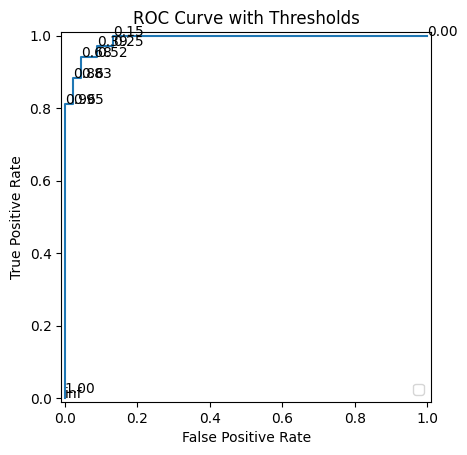

In [41]:
# Plotting ROC Curve showing Threshold value at each point
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
for i, threshold in enumerate(thresholds):
    roc_display.ax_.annotate(f"{threshold:.2f}", (fpr[i], tpr[i]))
roc_display.ax_.set_title("ROC Curve with Thresholds")
import matplotlib.pyplot as plt
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
#finding roc_auc_score
roc_auc_score(y_test, y_proba)

np.float64(0.9893719806763286)

In [45]:
#Import SVM and check ROC AUC Score
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)
y_proba_svm = svm.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_proba_svm)

np.float64(0.9642512077294685)

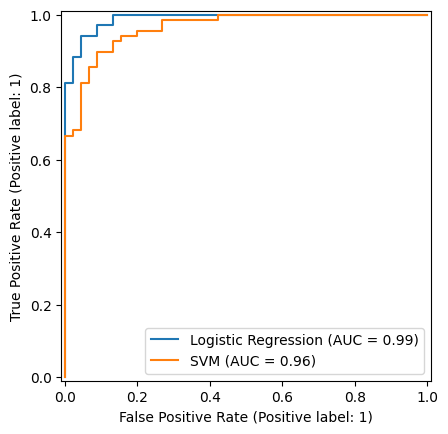

In [46]:
#Let's plot ROC Curve for both the models
roc_display_lr = RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression")
roc_display_svm = RocCurveDisplay.from_estimator(svm, X_test, y_test, name="SVM", ax=roc_display_lr.ax_)
plt.show()